## Long Cracks on Curved Boundaries

When cracks are long, we connect the expression for a very long crack (where effect from curved boundary is negligible) to the very short crack solution.

For the case of a crack near an edge-notched panel. For the case in Example 6 (p. 86 in text), we found $\beta_S = 4.515$

In [10]:
import  numpy as np
B3 = .7071+.7548+.3415+.6420+.9196
Fw = 1/np.cos(np.pi*.125/5)
Fww = 1
Fr = 0.9580
B_s = B3*Fw*Fww*4.147/3.1
print B_s

4.51542114936


The solution for a long crack, $\beta_L$ is given as (2.5a)

In [30]:
e = 0.5
W = 5.0
c = np.linspace(0,1,100)
aw = (c+e)/W
B = 1.122 - 0.231*aw + 10.55*aw**2 - 21.71*aw**3 + 30.82*aw**4
B_l = np.sqrt((c+e)/c)*B

Note that this is for the effective crack length, $a$.
To compare with the short crack solution, we need $K_I = \sqrt{\pi c} \beta$ (not $K_I = \sqrt{\pi (c+e)} \beta$)

We can re-write the formula as:
$$K_I = \sqrt{\pi (c+e)} \beta$$
$$ = \sqrt{\pi c}\sqrt{\frac{c+e}{c}} \beta$$

So $\beta_L = \sqrt{\frac{c+e}{c}} \beta$

We now plot these graphically and connect them

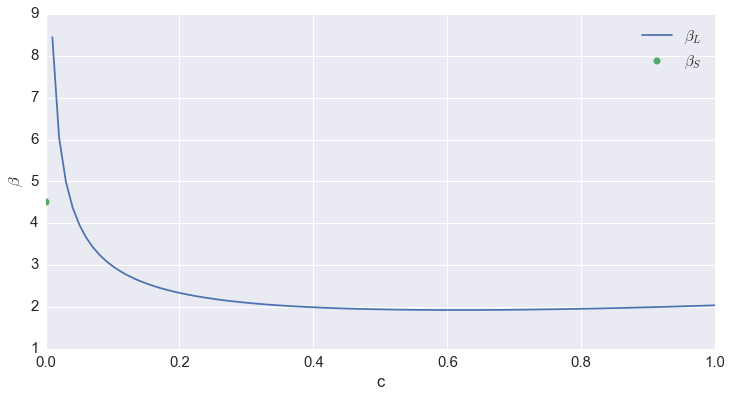

In [31]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(c,B_l,label=r'$\beta_L$')
plt.plot(0,B_s,'o',label=r'$\beta_S$')
plt.xlabel('c')
plt.ylabel(r'$\beta$')
plt.legend(loc='best')

We can now find the tangent line to connect $\beta_S$ and $\beta_L$.

In [63]:
from scipy import interpolate
#interpolate our discrete points
spl = interpolate.splrep(c[1:],B_l[1:])
x1 = 0.0829 #guess, adjust until they match
fa = interpolate.splev(x1,spl,der=0)
fprime = interpolate.splev(x1,spl,der=1)
print fa-fprime*x1
print B_s #(to find x1)


4.51568406997
4.51542114936


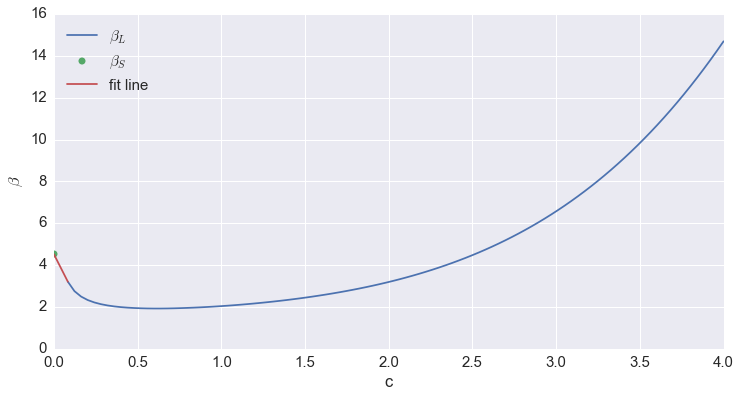

In [65]:
c = np.linspace(x1,4,100)#only plot B_l from end of tangent
shortc = np.linspace(0,x1)
aw = (c+e)/W
B = 1.122 - 0.231*aw + 10.55*aw**2 - 21.71*aw**3 + 30.82*aw**4
B_l = np.sqrt((c+e)/c)*B
plt.figure(figsize=(12,6))
plt.plot(c,B_l,label=r'$\beta_L$')
plt.plot(0,B_s,'o',label=r'$\beta_S$')
plt.plot(shortc,fa+fprime*(shortc-x1),label='fit line')
plt.xlabel('c')
plt.ylabel(r'$\beta$')
plt.legend(loc='best')